<a href="https://colab.research.google.com/github/pjatk-suml2023/suml-lab-ZG3Z/blob/main/SUML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# Ex. 1

Załaduj ponownie zbiór danych (DSP_6.csv), ale nie wykonuj jeszcze operacji na brakujących wartościach. Poszukaj innego sposobu wyświetlenia informacji o brakujących wartościach -wyświetl liczbę brakujących danych.

In [3]:
df = pd.read_csv('DSP_6.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Ex. 2

Dodaj kilka kolejnych wykresów w celu dalszej eksploracji danych. Stwórz wykres, który będzie pokazywać informację dotyczącą liczby członków rodziny na pokładzie. Stwórz wykres, który będzie pokazywać informację dotyczącą opłaty, która została uiszczona przez pasażerów. Z uwagi na to, że dane te zawierają przypadki odstające zmień jego wielkość za pomocą parametru figsize.

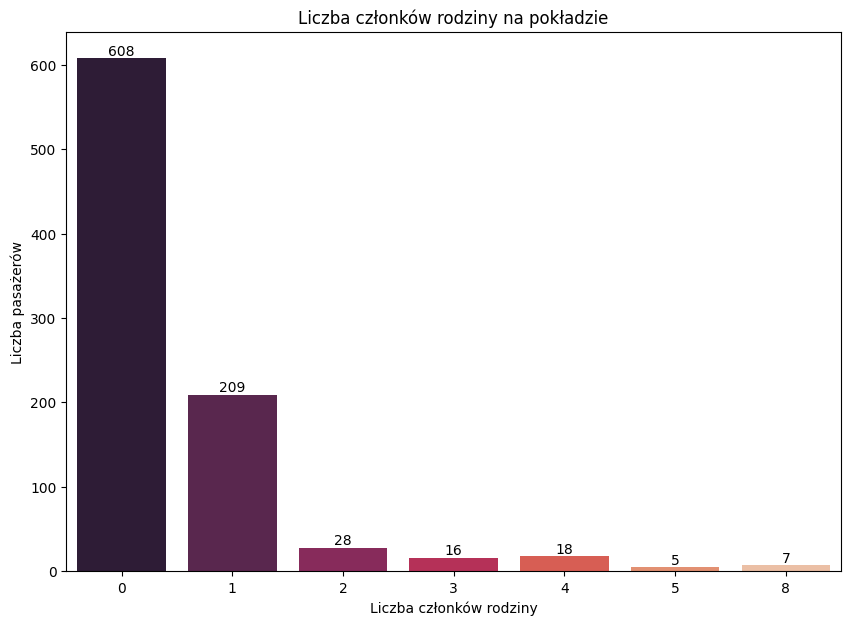

In [5]:
plt.figure(figsize=(10,7))
splot = sns.countplot(x='SibSp', data=df,  palette='rocket')
for p in splot.patches:
   splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Liczba członków rodziny na pokładzie')
plt.xlabel('Liczba członków rodziny')
plt.ylabel('Liczba pasażerów');

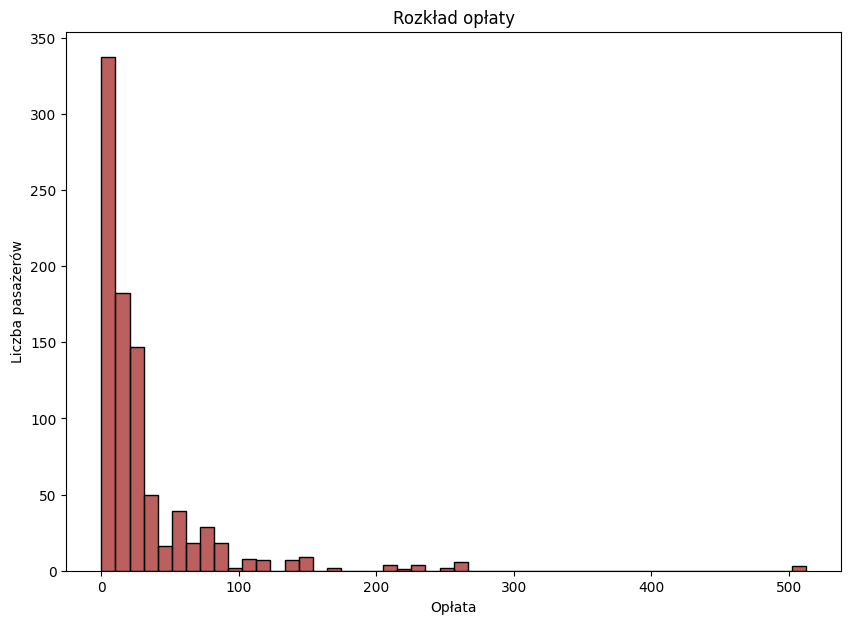

In [6]:
plt.figure(figsize=(10, 7))
splot = sns.histplot(x='Fare', data=df,  bins=50, color='brown')
plt.title('Rozkład opłaty')
plt.xlabel('Opłata')
plt.ylabel('Liczba pasażerów');

# Ex. 3

Spróbuj wytrenować nowy model regresji logistycznej dla tych samych danych. Tym razem zrób wcześniej błąd i nie dokonuj transformacji zmiennych (po prostu załaduj data frame, usuń przypadki odstające i spróbuj je zastosować do modelu). Jaki błąd otrzymujesz? Załaduj ponownie  model,  tym  razem  poprawnie,  ale  wytrenuj  model  dwukrotnie  modyfikując wybrane hiperparametry (test_size, random_state lub max_iter). Czy coś się zmienia w parametrach modelu?

In [7]:
data = df.copy()

In [8]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data.fillna(data.mean(numeric_only=True), inplace=True)
data.dropna(inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [9]:
replacement_value = data['Fare'].quantile(0.99)
data['Fare'] = data['Fare'].apply(lambda x: replacement_value if x > replacement_value else x)

In [10]:
x = data.drop('Survived', axis=1)
y = data['Survived']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [12]:
model = LogisticRegression()
model.fit(x_train, y_train)

ValueError: ignored

 Błąd, który otrzymujemy, wynika z próby wytrenowania modelu regresji logistycznej na danych zawierających zmienne kategoryczne bez odpowiedniej transformacji tych zmiennych na wartości liczbowe.


In [13]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [14]:
x = data.drop('Survived', axis=1)
y = data['Survived']

In [15]:
def model(params):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=params['test_size'], random_state=params['random_state'])

  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  model = LogisticRegression(max_iter=params['max_iter'])
  model.fit(x_train, y_train)

  train_predictions = model.predict(x_train)
  test_predictions = model.predict(x_test)

  train_accuracy = accuracy_score(y_train, train_predictions)
  test_accuracy = accuracy_score(y_test, test_predictions)

  print(f"Train set accuracy: {train_accuracy:.2f}")
  print(f"Test set accuracy: {test_accuracy:.2f}\n")
  print(classification_report(y_test, test_predictions))

In [16]:
hyperparameters_1 = {
    'test_size': 0.2,
    'random_state': 42,
    'max_iter': 100
}

hyperparameters_2 = {
    'test_size': 0.1,
    'random_state': 101,
    'max_iter': 500
}

print('Logistic Regression [{}]'.format(hyperparameters_1))
model(hyperparameters_1)

print('Logistic Regression [{}]'.format(hyperparameters_2))
model(hyperparameters_2)

Logistic Regression [{'test_size': 0.2, 'random_state': 42, 'max_iter': 100}]
Train set accuracy: 0.80
Test set accuracy: 0.78

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       109
           1       0.68      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178

Logistic Regression [{'test_size': 0.1, 'random_state': 101, 'max_iter': 500}]
Train set accuracy: 0.80
Test set accuracy: 0.85

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        57
           1       0.83      0.75      0.79        32

    accuracy                           0.85        89
   macro avg       0.85      0.83      0.84        89
weighted avg       0.85      0.85      0.85        89



Porównując wyniki tych dwóch treningów, możemy stwierdzić, czy zmiana hiperparametrów miała wpływ na wyniki modelu. Wyniki dla obu treningów były podobne, ale różniły się nieznacznie. To sugeruje, że zmiana hiperparametrów może wpłynąć na wyniki modelu.

# Ex. 4

Załaduj nowy zbiór danych DSP_2.csv. Wytrenuj nowy model regresji logistycznej w celu określenia czy u danej osoby wystąpi choroba serca (zmienna HeartDisease). Do wytrenowania modelu użyj wszystkich innych zmiennych, które występują w tym arkuszu. Czy model cechuje się dobrymi parametrami? Jeżeli tak, to dlaczego? Czy może zostać wykorzystany w praktyce?

In [17]:
df_2 = pd.read_csv('DSP_2.csv')

In [18]:
df_2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [19]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [20]:
df_2 = pd.get_dummies(df_2, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

In [21]:
x = df_2.drop('HeartDisease', axis=1)
y = df_2['HeartDisease']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

print(f'Train set accuracy: {train_accuracy:.2f}')
print(f'Test set accuracy: {test_accuracy:.2f}')
print(f'AUC score: {roc_auc:.2f}\n')
print(classification_report(y_test, test_predictions))

Train set accuracy: 0.87
Test set accuracy: 0.85
AUC score: 0.86

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



Na podstawie tych wyników można stwierdzić, że model regresji logistycznej ma dobre parametry i jest w stanie skutecznie klasyfikować osoby z chorobą serca.